In [1]:
import numpy as np
import scipy
import matplotlib as plt
import pandas as pd
import sklearn

In [4]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Mnist Dataset

In [33]:
mnist_train = pd.read_csv (r'C:\Users\Ghada\Downloads\mnist_train.csv')
mnist_test = pd.read_csv (r'C:\Users\Ghada\Downloads\mnist_test.csv')

# Explore Data

In [34]:
#Dimension of the dataset
print(mnist_train.shape)
print(mnist_test.shape)

(60000, 785)
(10000, 785)


In [37]:
#get first n data
print(mnist_train.head(20))

    label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0       5    0    0    0    0    0    0    0    0    0  ...      0      0   
1       0    0    0    0    0    0    0    0    0    0  ...      0      0   
2       4    0    0    0    0    0    0    0    0    0  ...      0      0   
3       1    0    0    0    0    0    0    0    0    0  ...      0      0   
4       9    0    0    0    0    0    0    0    0    0  ...      0      0   
5       2    0    0    0    0    0    0    0    0    0  ...      0      0   
6       1    0    0    0    0    0    0    0    0    0  ...      0      0   
7       3    0    0    0    0    0    0    0    0    0  ...      0      0   
8       1    0    0    0    0    0    0    0    0    0  ...      0      0   
9       4    0    0    0    0    0    0    0    0    0  ...      0      0   
10      3    0    0    0    0    0    0    0    0    0  ...      0      0   
11      5    0    0    0    0    0    0    0    0    0  ...      0      0   

In [38]:
print(mnist_test.head(20))

    label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0       7    0    0    0    0    0    0    0    0    0  ...      0      0   
1       2    0    0    0    0    0    0    0    0    0  ...      0      0   
2       1    0    0    0    0    0    0    0    0    0  ...      0      0   
3       0    0    0    0    0    0    0    0    0    0  ...      0      0   
4       4    0    0    0    0    0    0    0    0    0  ...      0      0   
5       1    0    0    0    0    0    0    0    0    0  ...      0      0   
6       4    0    0    0    0    0    0    0    0    0  ...      0      0   
7       9    0    0    0    0    0    0    0    0    0  ...      0      0   
8       5    0    0    0    0    0    0    0    0    0  ...      0      0   
9       9    0    0    0    0    0    0    0    0    0  ...      0      0   
10      0    0    0    0    0    0    0    0    0    0  ...      0      0   
11      6    0    0    0    0    0    0    0    0    0  ...      0      0   

In [39]:
print(mnist_train.describe())

              label      1x1      1x2      1x3      1x4      1x5      1x6  \
count  60000.000000  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0   
mean       4.453933      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.889270      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

           1x7      1x8      1x9  ...         28x19         28x20  \
count  60000.0  60000.0  60000.0  ...  60000.000000  60000.000000   
mean       0.0      0.0      0.0  ...      0.200433      0.088867   
std        0.0      0.0      0.0  ...      6.042472      3.956189   
min        0.0      0.0      0

In [122]:
mnist_train.tail()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# labels column separation

In [49]:
X, y = mnist_train.drop(labels = ["label"],axis = 1).to_numpy(), mnist_train["label"]
X.shape

(60000, 784)

3

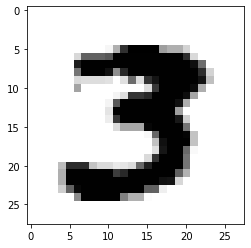

In [72]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

some_digit = X[27]
some_digit_show = plt.imshow(X[27].reshape(28,28), cmap=mpl.cm.binary)
y[27]

# binary model

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=27)

In [79]:
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

In [107]:
# Training Process

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=27)
rf_clf.fit(X_train, y_train_3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=27, verbose=0,
                       warm_start=False)

In [108]:
rf_clf.predict([some_digit])

array([ True])

# Confusion Matrix

In [91]:
from sklearn.metrics import confusion_matrix

def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns

In [92]:
print("label precision recall")
for label in range(10):
    print(f"{label:5d} {precision(label, X):9.3f} {recall(label, X):6.3f}")

label precision recall
    0       nan  0.000
    1       nan  0.000
    2       nan  0.000
    3       nan  0.000
    4       nan  0.000
    5       nan  0.000
    6       nan  0.000
    7       nan  0.000
    8       nan  0.000
    9       nan  0.000


C:\Users\Ghada\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  """


In [106]:
# Performance Measures 

from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv= 3)


confusion_matrix(y_train_3, y_train_pred)

array([[47549,   897],
       [ 1265,  4289]], dtype=int64)

# multiclass classification

In [110]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=27)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=27, verbose=0,
                       warm_start=False)

In [112]:
y_test_pred = rf_clf.predict(X_test)

In [113]:
y_test_pred

array([0, 3, 1, ..., 2, 4, 1], dtype=int64)

In [114]:
y_test

15542    0
46911    3
32958    1
24646    8
47305    5
        ..
55940    8
13819    7
28324    2
28034    4
20506    1
Name: label, Length: 6000, dtype: int64

In [115]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.9686666666666667

In [116]:
from sklearn.metrics import precision_score

precision_score(y_test, y_test_pred, average="micro")

0.9686666666666667

In [117]:
from sklearn.metrics import recall_score

recall_score(y_test, y_test_pred, average="micro")

0.9686666666666667

In [118]:
from sklearn.metrics import f1_score

f1_score(y_test, y_test_pred, average="micro")

0.9686666666666667

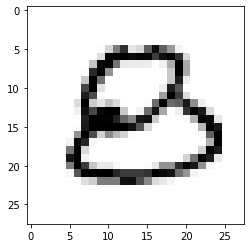

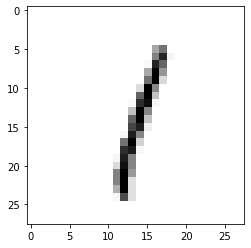

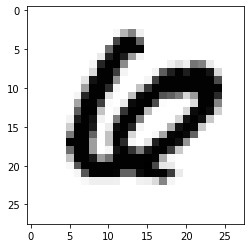

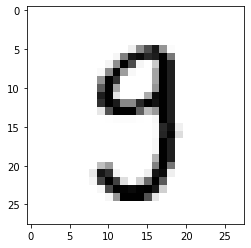

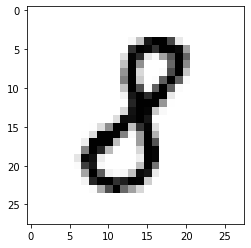

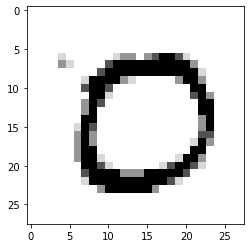

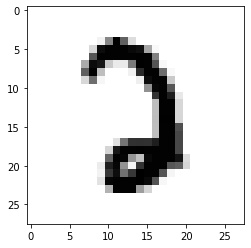

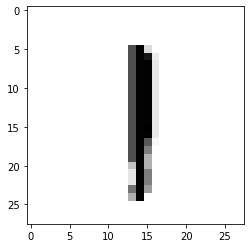

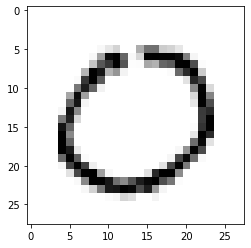

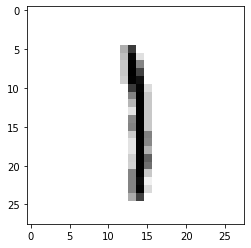

In [123]:
for i in range(10):
    img = X_train[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()